Public Service of Canada
=========

[Data Source: Government of Canada Employee Contact Information](https://open.canada.ca/data/en/dataset?keywords=GEDS)

[Licence: Open Government Licence - Canada](https://open.canada.ca/en/open-government-licence-canada)

https://www.dataquest.io/blog/jupyter-notebook-tutorial/

Helpful Pages
---

https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python

https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data

https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

Inputs and Outputs
========

inputs --> sanitized csv

--- outputs ---

Number of Federal Civil Servants by Department
    by sub department
By Province
By City

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
from IPython.core.display import HTML
css = open('../css/style-table.css').read() + open('../css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

=Begin Sanitization=

In [3]:
df0 = pd.read_csv('gedsOpenData.csv', encoding = "ISO-8859-1", error_bad_lines=False)

b'Skipping line 42148: expected 44 fields, saw 50\nSkipping line 42149: expected 44 fields, saw 50\nSkipping line 42150: expected 44 fields, saw 50\nSkipping line 42151: expected 44 fields, saw 57\nSkipping line 42152: expected 44 fields, saw 57\nSkipping line 42153: expected 44 fields, saw 57\nSkipping line 42154: expected 44 fields, saw 57\nSkipping line 42155: expected 44 fields, saw 57\n'
b'Skipping line 49170: expected 44 fields, saw 50\nSkipping line 50060: expected 44 fields, saw 57\n'
b'Skipping line 150885: expected 44 fields, saw 60\nSkipping line 150886: expected 44 fields, saw 60\nSkipping line 151023: expected 44 fields, saw 50\nSkipping line 151024: expected 44 fields, saw 50\nSkipping line 151025: expected 44 fields, saw 50\nSkipping line 151026: expected 44 fields, saw 50\nSkipping line 151027: expected 44 fields, saw 58\nSkipping line 151028: expected 44 fields, saw 58\nSkipping line 151029: expected 44 fields, saw 58\nSkipping line 151030: expected 44 fields, saw 58\n

In [4]:
df0.head()

,Surname,GivenName,Initials,Prefix (EN),Prefix (FR),Suffix (EN),Suffix (FR),Title (EN),Title (FR),Telephone Number,...,Executive Assistant,Executive Assistant Telephone Number,Department Acronym,Department Name (EN),Department Name (FR),Organization Acronym,Organization Name (EN),Organization Name (FR),Organization Structure (EN),Organization Structure (FR)
0,Pelletier,Marie-France,NaN,NaN,NaN,NaN,NaN,Chief Administrator,Administrateur en chef,613-954-0860,...,Christine Bazinet,613-954-0860,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,Service canadien d'appui aux tribunaux admini...,ATSSC-SCDATA,Office of the Chief Administrator,Bureau de l'administrateur en chef,"Canada (O=GC,C=CA):Administrative Tribunals Su...","Canada (O=GC,C=CA):Service canadien d'appui a..."
1,Gibeault,Christian,NaN,NaN,NaN,NaN,NaN,Facilities Management Officer,Agent de gestion des installations,613-867-9967,...,NaN,NaN,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,Service canadien d'appui aux tribunaux admini...,FAC-GES,Facilities Management and Occupational Health ...,Gestion des Installations et Santé et Sécurité...,"Canada (O=GC,C=CA):Administrative Tribunals Su...","Canada (O=GC,C=CA):Service canadien d'appui a..."
2,Laforge,Kim,NaN,NaN,NaN,NaN,NaN,Senior Facilities Project Officer,Agente principale de projets d'installations,613-513-4816,...,NaN,NaN,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,Service canadien d'appui aux tribunaux admini...,FAC-GES,Facilities Management and Occupational Health ...,Gestion des Installations et Santé et Sécurité...,"Canada (O=GC,C=CA):Administrative Tribunals Su...","Canada (O=GC,C=CA):Service canadien d'appui a..."
3,Proulx,Stéphanie,NaN,NaN,NaN,NaN,NaN,Facilities Management Officer,Agente de gestion des installations,613-410-8176,...,NaN,NaN,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,Service canadien d'appui aux tribunaux admini...,FAC-GES,Facilities Management and Occupational Health ...,Gestion des Installations et Santé et Sécurité...,"Canada (O=GC,C=CA):Administrative Tribunals Su...","Canada (O=GC,C=CA):Service canadien d'appui a..."
4,Terrien,Eric,NaN,NaN,NaN,NaN,NaN,Personnel Security Officer,"Agent, Sécurité du personnel",613-790-3527,...,NaN,NaN,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,Service canadien d'appui aux tribunaux admini...,SEC-OPE,Emergency Management and Security Operations,Gestion des Urgences et Opérations de Sécurité,"Canada (O=GC,C=CA):Administrative Tribunals Su...","Canada (O=GC,C=CA):Service canadien d'appui a..."


In [5]:
# df0.tail()

In [6]:
df0.columns

Index(['Surname', 'GivenName', 'Initials', 'Prefix (EN)', 'Prefix (FR)',
       'Suffix (EN)', 'Suffix (FR)', 'Title (EN)', 'Title (FR)',
       'Telephone Number', 'Fax Number', 'TDD Number',
       'Secure Telephone Number', 'Secure Fax Number',
       'Alternate Telephone Number', 'Email', 'Street Address (EN)',
       'Street Address (FR)', 'Country (EN)', 'Country (FR)', 'Province (EN)',
       'Province (FR)', 'City (EN)', 'City (FR)', 'Postal Code', 'PO Box (EN)',
       'PO Box (FR)', 'Mailstop', 'Building (EN)', 'Building (FR)', 'Floor',
       'Room', 'Administrative Assistant',
       'Administrative Assistant Telephone Number', 'Executive Assistant',
       'Executive Assistant Telephone Number', 'Department Acronym',
       'Department Name (EN)', 'Department Name (FR)', 'Organization Acronym',
       'Organization Name (EN)', 'Organization Name (FR)',
       'Organization Structure (EN)', 'Organization Structure (FR)'],
      dtype='object')

In [7]:
len(df0)

178896

In [8]:
#df0.dtypes

In [9]:
columns_of_interest = ['Street Address (EN)',
       'Street Address (FR)', 'Country (EN)', 'Country (FR)', 'Province (EN)',
       'Province (FR)', 'City (EN)', 'City (FR)', 'Postal Code', 'PO Box (EN)',
       'PO Box (FR)', 'Mailstop', 'Building (EN)', 'Building (FR)', 'Floor',
       'Room', 'Department Acronym','Department Name (EN)', 'Department Name (FR)', 'Organization Acronym',
       'Organization Name (EN)', 'Organization Name (FR)',
       'Organization Structure (EN)', 'Organization Structure (FR)']

columns_of_interest_e = ['Street Address (EN)',
       'Country (EN)', 'Province (EN)',
       'City (EN)','Postal Code', 'Department Acronym','Department Name (EN)', 'Organization Acronym',
       'Organization Name (EN)']

In [10]:
df1 = df0[columns_of_interest_e]

In [11]:
df1.head().fillna(' ')

,Street Address (EN),Country (EN),Province (EN),City (EN),Postal Code,Department Acronym,Department Name (EN),Organization Acronym,Organization Name (EN)
0,"344 Slater street, 15th Floor, Suite 100",Canada,Ontario,Ottawa,K1A 0B6,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,ATSSC-SCDATA,Office of the Chief Administrator
1,"333 Laurier Avenue West, 15th Floor",Canada,Ontario,Ottawa,K1A 0G7,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,FAC-GES,Facilities Management and Occupational Health ...
2,"333 Laurier Avenue West, 15th Floor",Canada,Ontario,Ottawa,K1A 0G7,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,FAC-GES,Facilities Management and Occupational Health ...
3,"333 Laurier Avenue West, 15th Floor",Canada,Ontario,Ottawa,K1A 0G7,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,FAC-GES,Facilities Management and Occupational Health ...
4,"333 Laurier Avenue West, 15th Floor",Canada,Ontario,Ottawa,K1A 0G7,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,SEC-OPE,Emergency Management and Security Operations


In [12]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [13]:
df1.columns

Index(['street_address_en', 'country_en', 'province_en', 'city_en',
       'postal_code', 'department_acronym', 'department_name_en',
       'organization_acronym', 'organization_name_en'],
      dtype='object')

In [14]:
df = df1.head()

In [15]:
df = df.sort_values('city_en').head(10)
df[df.city_en == 'Ottawa'].sort_values('department_acronym')

,street_address_en,country_en,province_en,city_en,postal_code,department_acronym,department_name_en,organization_acronym,organization_name_en
0,"344 Slater street, 15th Floor, Suite 100",Canada,Ontario,Ottawa,K1A 0B6,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,ATSSC-SCDATA,Office of the Chief Administrator
1,"333 Laurier Avenue West, 15th Floor",Canada,Ontario,Ottawa,K1A 0G7,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,FAC-GES,Facilities Management and Occupational Health ...
2,"333 Laurier Avenue West, 15th Floor",Canada,Ontario,Ottawa,K1A 0G7,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,FAC-GES,Facilities Management and Occupational Health ...
3,"333 Laurier Avenue West, 15th Floor",Canada,Ontario,Ottawa,K1A 0G7,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,FAC-GES,Facilities Management and Occupational Health ...
4,"333 Laurier Avenue West, 15th Floor",Canada,Ontario,Ottawa,K1A 0G7,ATSSC-SCDATA,Administrative Tribunals Support Service of Ca...,SEC-OPE,Emergency Management and Security Operations


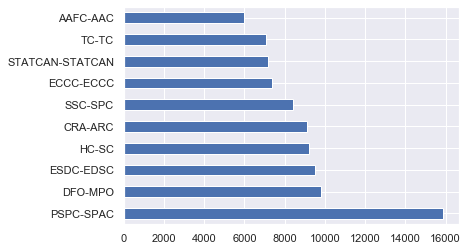

In [16]:
df1.department_acronym.value_counts().head(10).plot(kind='barh')

In [17]:
depts = df1.department_acronym.unique()
depts

array(['ATSSC-SCDATA', 'AAFC-AAC', 'APEX-APEX', 'ACOA-APECA', 'APA-APA',
       'AECL-EACL', 'OAG-BVG', 'CART-CRAC', 'CBSA-ASFC', 'CC-CAC',
       'CED-DEC', 'CIRB-CCRI', 'CMHC-SCHL', 'CRA-ARC', 'CSPS-EFPC',
       'CATSA-ACSTA', 'CCOHS-CCHST', 'CCSA-CCLT', 'CCC-CCC',
       'CCPERB-CCEEBC', 'CDC-CCL', 'CEAA-ACEE', 'CFIA-ACIA', 'CGC-CCG',
       'PCH-PCH', 'CHRC-CCDP', 'CHRT-TCDP', 'CIHR-IRSC', 'CICS-SCIC',
       'CITT-TCCE', 'CJC-CCM', 'CMHR-MCDP', 'CMH-MCH', 'CMN-MCN',
       'CANNOR-CANNOR', 'CNSC-CCSN', 'CRTC-CRTC', 'CSIS-SCRS', 'CSA-ASC',
       'CTC-CCT', 'CTA-OTC', 'CRCC-CCETP', 'CSEC-CSTC', 'CT-TC', 'CB-CDA',
       'CSC-SCC', 'CMAC-CACM', 'CAS-SATJ', 'DCC-CDC', 'DRDC-RDDC',
       'DI-ID', 'SWC-CFC', 'ESDC-EDSC', 'ECCC-ECCC', 'FPCC-CPAC',
       'FCT-CF', 'FCA-CAF', 'FDO-FDO', 'PSLREB-CRTEFP', 'FIN-FIN',
       'FCAC-ACFC', 'FINTRAC-CANAFE', 'DFO-MPO', 'GAC-AMC', 'GG-GG',
       'HC-SC', 'HOC-CDC', 'IRB-CISR', 'IRCC-IRCC', 'IRSAS-SAPI',
       'INAC-AANC', 'ISC-SAC', 'INFC-IN

In [18]:
len(depts)

152

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178896 entries, 0 to 178895
Data columns (total 9 columns):
street_address_en       162999 non-null object
country_en              166054 non-null object
province_en             165126 non-null object
city_en                 165035 non-null object
postal_code             163254 non-null object
department_acronym      178896 non-null object
department_name_en      178896 non-null object
organization_acronym    178896 non-null object
organization_name_en    178896 non-null object
dtypes: object(9)
memory usage: 12.3+ MB


In [20]:
province_list = df1['province_en'].unique().tolist()
city_list = df1['city_en'].unique().tolist()
cleanedList = [x for x in city_list if str(x) != 'nan']
sorted(cleanedList)

['225 Holditch Street',
 '350 King Edward Avenue',
 'AMHERST',
 'Abbotsford',
 'Abernethy',
 'Acton',
 'Agassiz',
 'Ajax',
 'Albany',
 'Alberton',
 'Aldouane',
 'Alma',
 'Alouette',
 'Amherst',
 'Amherstburg',
 'Ange-Gardien',
 'Annapolis Royal',
 'Antigonish',
 'Antigonish County',
 'Arborg',
 'Archipelle de Mingan',
 'Argentia',
 "Arnold's Cove",
 'Arnolds Cove',
 'Astra',
 'Attawapiskat',
 'Aulac',
 'Aurora',
 'BIBLE HILL',
 'BRANTFORD',
 'Baddeck',
 'Bagotville',
 'Baie Verte',
 'Baie-Comeau',
 'Baie-Sainte-Anne',
 'Bamfield',
 'Banff',
 'Barrie',
 'Barrington Passage',
 'Bath',
 'Bathurst',
 'Battleford',
 'Bay Bulls',
 'Bay Roberts',
 'Bearskin Lake',
 'Beaverlodge',
 'Bedford',
 'Bella Coola',
 'Belleville',
 'Benton',
 'Beresford',
 'Beulah',
 'Bible Hill',
 'Big Trout Lake',
 'Bishop Falls',
 'Blainville',
 'Blanc-Sablon',
 'Bloodvein',
 'Boissevain',
 'Bonavista',
 'Borden',
 'Borden-Carleton',
 'Boucherville',
 'Bowmanville',
 'Brackendale',
 'Brampton',
 'Brandon',
 'Brantf

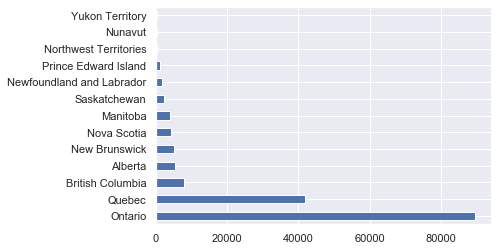

In [21]:
# Public servants by province
df1['province_en'].value_counts().head(13).plot(kind='barh')

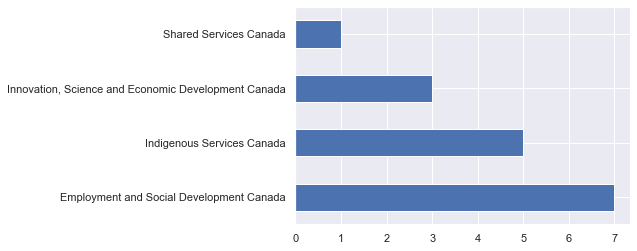

In [22]:
# public servants in Timmins
# ESDC are not using GEDS
df1[df1.city_en == 'Timmins'].department_name_en.value_counts().plot(kind='barh')

In [23]:
df1[df1.department_acronym == 'SSC-SPC'].organization_acronym.value_counts().head(10)

MISC-MISC    1956
SMDC-GSCD     565
SSC-SPC       113
CS-SM         108
MO-OUC        103
PSS-SSP        98
XXX-XXX        87
FMAS-SCGF      85
DS-SR          82
MS-SI          81
Name: organization_acronym, dtype: int64

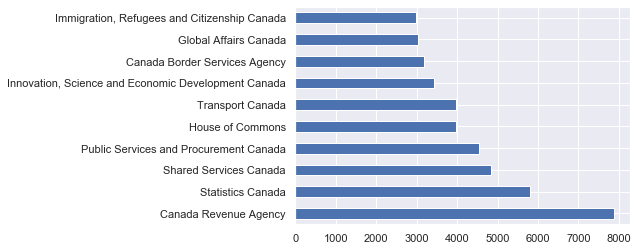

In [24]:
# public servants in Ottawa by department
df1[df1.city_en == 'Ottawa'].department_name_en.value_counts().head(10).plot(kind='barh')

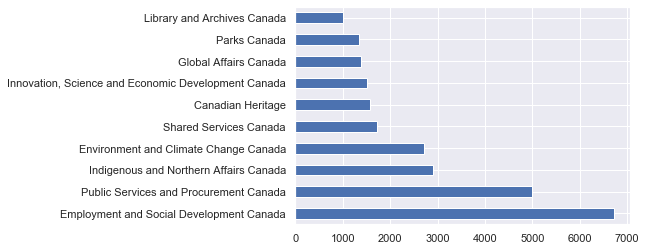

In [25]:
# public servants in Gatineau by department
df1[df1.city_en == 'Gatineau'].department_name_en.value_counts().head(10).plot(kind='barh')

In [26]:
[print(city) for city in city_list]['Ontario',
 'Nova Scotia',
 'Quebec',
 'British Columbia',
 'Manitoba',
 'Saskatchewan',
 'Prince Edward Island',
 'Newfoundland and Labrador',
 'New Brunswick',
 'Alberta',
 'Yukon Territory',
 'Brussels-Capital Region',
 nan,
 'Northwest Territories',
 'Yukon',
 'Québec',
 'PEI',
 'YK',
 'BC',
 'K1P6B9',
 'ON\\\\ON',
 'K1A 0Y9',
 'Bretish Columbia',
 'Nove Scotia',
 'Newfoundland',
 'New-Brunswick',
 'Nunavut',
 'Texas',
 'District Of Columbia',
 'Hauts De Seine',
 'England',
 'ONT',
 'On.',
 'Nova Sotia',
 'BRITISH COLUMBIA',
 'SASKATCHEWAN',
 'ALBERTA',
 'ONTARIO',
 'MANITOBA',

SyntaxError: unexpected EOF while parsing (<ipython-input-26-7bd76f236956>, line 39)